In [19]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd

# Exploring
import scipy.stats as stats

# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling
import statsmodels.api as sm

from scipy.stats import pearsonr

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error

## read the csv

In [20]:
path = "./"
df_grades = pd.read_csv(path + "student_grades.csv")

## sample and summarize

In [21]:
print(f"Head:\n{df_grades.head()}\n")
print(f"Shape: {df_grades.shape}\n")
df_describe_grades = df_grades.describe()
print(f"Description:\n{df_describe_grades}\n")

Head:
   student_id  exam1  exam2  exam3  final_grade
0           1    100     90     95           96
1           2     98     93     96           95
2           3     85     83     87           87
3           4     83     80     86           85
4           5     93     90     96           97

Shape: (104, 5)

Description:
       student_id       exam1       exam2       exam3  final_grade
count  104.000000  104.000000  104.000000  104.000000   104.000000
mean    52.500000   78.461538   77.307692   84.153846    81.692308
std     30.166206   14.284844   10.295703    8.714199    10.918122
min      1.000000   57.000000   65.000000   70.000000    65.000000
25%     26.750000   70.000000   70.000000   78.000000    72.000000
50%     52.500000   79.000000   75.000000   85.000000    81.000000
75%     78.250000   92.000000   89.000000   94.000000    93.000000
max    104.000000  100.000000   93.000000   96.000000    97.000000



### 1.a Extract information from the results of .describe and compute IQR and range of each exam and the final grade

In [22]:
def iqr_from_describe(col):
    return col.loc["75%"] - col.loc["25%"]

def range_from_describe(col):
    return col.loc["max"] - col.loc["min"]

IQR_exam1 = iqr_from_describe(df_describe_grades.exam1)
IQR_exam2 = iqr_from_describe(df_describe_grades.exam2)
IQR_exam3 = iqr_from_describe(df_describe_grades.exam3)
IQR_final_grade = iqr_from_describe(df_describe_grades.final_grade)

range_exam1 = range_from_describe(df_describe_grades.exam1)
range_exam2 = range_from_describe(df_describe_grades.exam2)
range_exam3 = range_from_describe(df_describe_grades.exam3)
range_final_grade = range_from_describe(df_describe_grades.final_grade)

df_iqr_range = pd.DataFrame({"iqr": [IQR_exam1, IQR_exam2, IQR_exam3, IQR_final_grade], "range": [range_exam1, range_exam2, range_exam3, range_final_grade]})
df_iqr_range.rename(index={0: "exam1", 1: "exam2", 2: "exam3", 3: "final_grade"}, inplace=True)
print(df_iqr_range, "\n")


              iqr  range
exam1        22.0   43.0
exam2        19.0   28.0
exam3        16.0   26.0
final_grade  21.0   32.0 



## checking for null values

In [23]:
print(f"{df_grades.isnull().sum()}\n")

student_id     0
exam1          0
exam2          0
exam3          0
final_grade    0
dtype: int64



## histograms

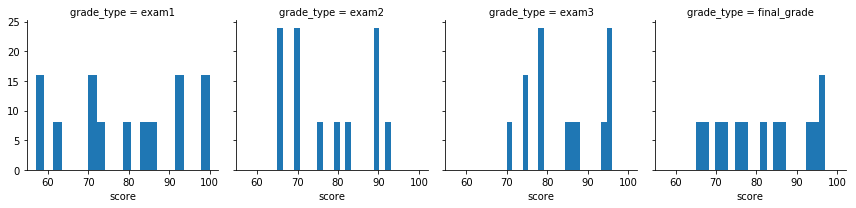

In [24]:
df_melted_grades = pd.melt(df_grades, id_vars=["student_id"], value_vars=["exam1", "exam2", "exam3", "final_grade"],
                          var_name="grade_type", value_name="score")
df_melted_grades.head()

grid = sns.FacetGrid(df_melted_grades, col="grade_type", margin_titles=True)
grid.map(plt.hist, "score", bins=20)
plt.show()


## boxplots

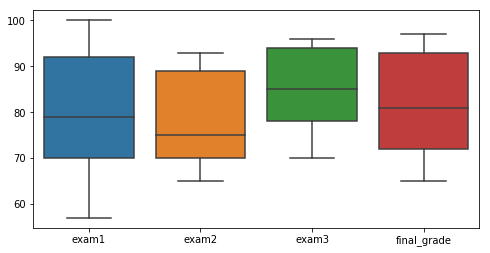

In [25]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df_grades.drop(columns=["student_id"]))
plt.show()


## split into test/train

In [26]:
X = df_grades.drop(["final_grade", "student_id"], axis=1)
y = df_grades[["final_grade"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

def rows_are_equal(df1, df2):
    return df1.shape[0] == df2.shape[0]

def cols_are_equal(df1, df2):
    return df1.shape[1] == df2.shape[1]

def split_ratio(df, other):
    total_rows = df.shape[0] + other.shape[0]
    return df.shape[0] / total_rows

print(f"Training:\n{df_train.head()}\n\nTesting:\n{df_test.head()}\n")

assert rows_are_equal(X_train, y_train)
assert rows_are_equal(X_test, y_test)

assert cols_are_equal(df_train, df_test)

assert round(split_ratio(df_train, df_test), 1) == 0.8
assert round(split_ratio(df_test, df_train), 1) == 0.2


Training:
    exam1  exam2  exam3  final_grade
68     83     80     86           85
3      83     80     86           85
74     62     70     79           70
82     93     90     96           97
75     58     65     70           68

Testing:
    exam1  exam2  exam3  final_grade
26    100     90     95           96
61     62     70     79           70
2      85     83     87           87
62     58     65     70           68
85     73     70     75           76



## scatter and density plots

### 1.b Write a for loop to plot each of the 3 features with final_grade using a jointplot

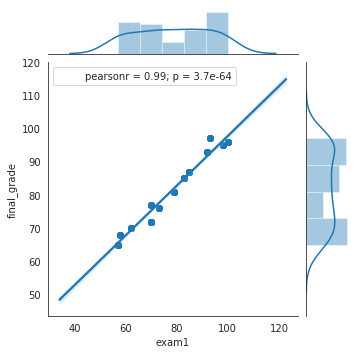

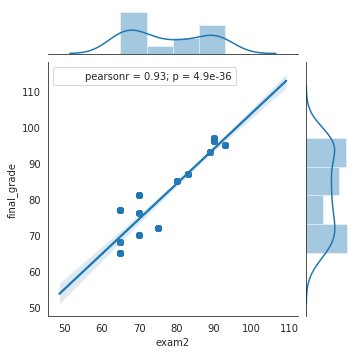

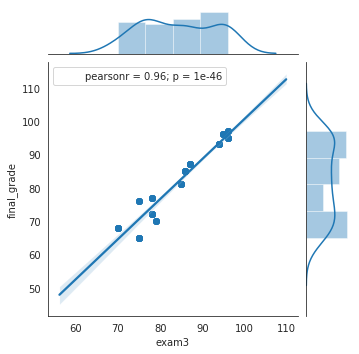

In [27]:
with sns.axes_style("white"):
    for i, col in enumerate(["exam1", "exam2", "exam3"]):
        # plt.subplot(3, 1, i + 1)
        j = sns.jointplot(col, "final_grade", data=df_train, kind="reg", height=5)
        j.annotate(pearsonr)
plt.show()

### What can you say about each relationship (using pearson's r and the p-value)

Histogram + Scatterplots
There is a high correlation between each of the exams and the final grade. The results are reliable because the p-value is less than 0.5

## histogram and scatterplots

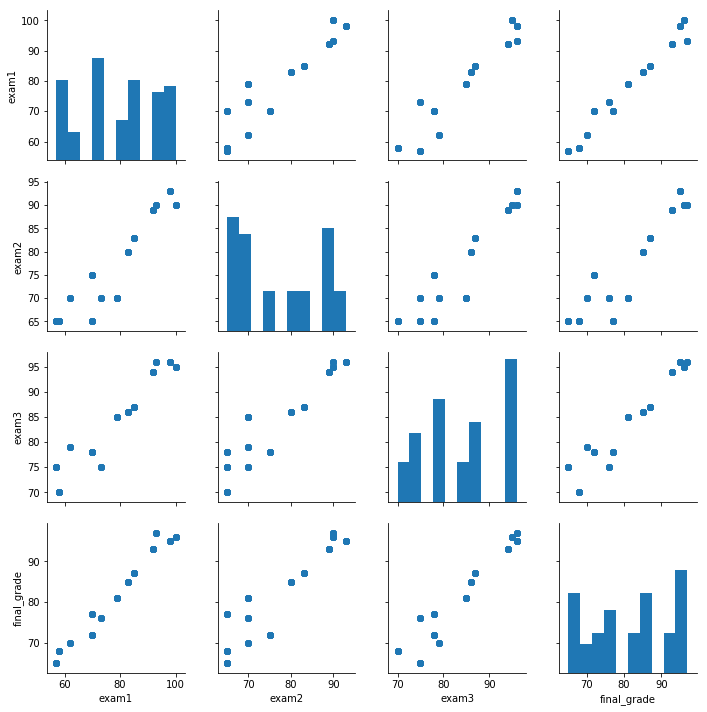

In [28]:
g = sns.PairGrid(df_train)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
plt.show()

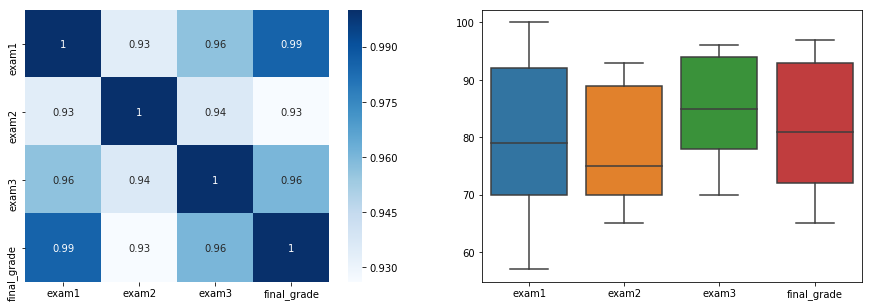

In [29]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# heatmap
sns.heatmap(df_train.corr(), cmap="Blues", annot=True, ax=ax1)

# boxplot
sns.boxplot(data=df_grades.drop(columns=["student_id"]), ax=ax2)

plt.show()

## Pearson's correlation

In [30]:
column_names = X_train.columns
r_and_p_values = {col: pearsonr(X_train[col], y_train.final_grade) for col in column_names}

## Feature selection

In [31]:
ols_model = sm.OLS(y_train, X_train)
fit = ols_model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            final_grade   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 5.103e+04
Date:                Wed, 20 Mar 2019   Prob (F-statistic):          3.76e-131
Time:                        14:34:39   Log-Likelihood:                -170.25
No. Observations:                  83   AIC:                             346.5
Df Residuals:                      80   BIC:                             353.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
exam1          0.4555      0.036     12.625      0.000       0.384       0.527
exam2         -0.0307      0.063     -0.486      0.629      -0.157       0.095
exam3          0.5728      0.049     11.633      0.000       0.475       0.671
==============================================================================
Omnibus:                       30.491   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                7.671
Skew:                           0.427   Prob(JB):                       0.0216
Kurtosis:                       1.780   Cond. No.                         51.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Fit Linear Regression Models, In-Sample Predictions

### Linear Model 1

In [32]:
lm1 = LinearRegression()
lm1.fit(df_train[['exam1']], y_train)

lm1_y_intercept = lm1.intercept_

lm1_coefficients = lm1.coef_

print('Univariate - final_exam = b + m * exam1')
print('    y-intercept (b): %.2f' % lm1_y_intercept)
print('    coefficient (m): %.2f' % lm1_coefficients[0])
print()

y_pred_lm1 = lm1.predict(df_train[['exam1']])

mse_lm1 = mean_squared_error(y_train, y_pred_lm1)
print("lm1\n  mse: {:.3}".format(mse_lm1))

r2_lm1 = r2_score(y_train, y_pred_lm1)
print('  {:.2%} of the variance in the student''s final grade can be explained by the grade on the first exam.'.format(r2_lm1))


Univariate - final_exam = b + m * exam1
    y-intercept (b): 22.88
    coefficient (m): 0.75

lm1
  mse: 3.37
  97.12% of the variance in the students final grade can be explained by the grade on the first exam.


### 1.d. What are your take-aways from the evaluation results of lm1 and lm2?

lm2 was better because it had a lower MSE and a good R2. lm2 had two variables with low p-values.
lm2 had an additional variable that provided more information.

### Linear Model 3

### 1.e. Fit, predict, and evaluate one more model, lm3, using exam 3 only.

In [33]:
lm3 = LinearRegression()
lm3.fit(df_train[["exam3"]], df_train["final_grade"])

lm3_y_intercept = lm3.intercept_
lm3_coefficients = lm3.coef_
print(f"Univariate - final_exam = b + m * exam3\n"
     f"\ty-intercept (b): {lm3_y_intercept:.2f}\n"
     f"\tcoefficient (m): {lm3_coefficients[0]:.2f}\n")

y_pred_lm3 = lm3.predict(df_train[["exam3"]])
mse_lm3 = mean_squared_error(y_train, y_pred_lm3)
print(f"lm3\n\tmse: {mse_lm3:.3}")

r2_lm3 = r2_score(df_train["final_grade"], y_pred_lm3)
print(f"\t{r2_lm3:.2%} of the variance in the student's final grade can be explained by the grade on the third exam.")


Univariate - final_exam = b + m * exam3
	y-intercept (b): -19.63
	coefficient (m): 1.20

lm3
	mse: 9.08
	92.24% of the variance in the student's final grade can be explained by the grade on the third exam.


Text(0.5, 1.0, 'Predicted vs Actual Final Grade')

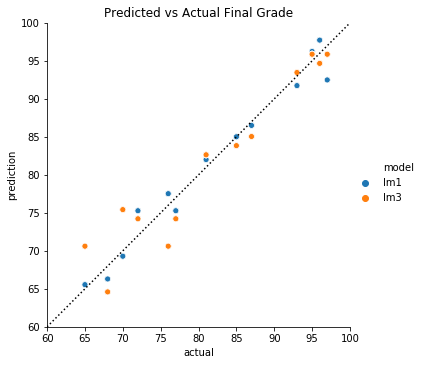

In [34]:
pd.DataFrame({'actual': y_train.final_grade,
              'lm1': y_pred_lm1.ravel(),
              # 'lm2': y_pred_lm2.ravel(),
              'lm3': y_pred_lm3.ravel()})\
    .melt(id_vars=['actual'], var_name='model', value_name='prediction')\
    .pipe((sns.relplot, 'data'), x='actual', y='prediction', hue='model')

plt.plot([60, 100], [60, 100], c='black', ls=':')
plt.ylim(60, 100)
plt.xlim(60, 100)
plt.title('Predicted vs Actual Final Grade')

lm1 Test
	mse: 4.75
	96.12% of the variance in the student's final grade can be explained by the grade on the first exam.



Text(0, 0.5, 'Residuals')

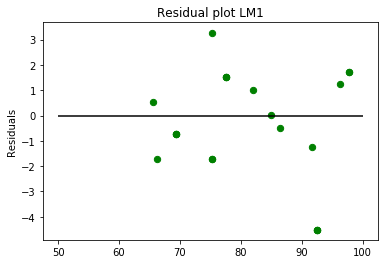

In [35]:
y_test_pred_lm1 = lm1.predict(df_test[["exam1"]])

mse_test_lm1 = mean_squared_error(df_test["final_grade"], y_test_pred_lm1)
print(f"lm1 Test\n\tmse: {mse_test_lm1:.3}")

r2_test_lm1 = r2_score(df_test["final_grade"], y_test_pred_lm1)
print(f"\t{r2_test_lm1:.2%} of the variance in the student's final grade can be explained by the grade on the first exam.")

print("")
plt.scatter(y_test_pred_lm1, y_test_pred_lm1 - y_test, c='g', s=40)
plt.hlines(y=0, xmin=50, xmax=100)
plt.title("Residual plot LM1")
plt.ylabel('Residuals')


### 1.f. How does the result of the model compare to the other two?

Model 3 about three times the MSE and a lower R2.

### Which should you use, based on these results?

Model 2. It has the lowest MSE and the best R2.

### 1.g. Predict final grades of the out-of-sample data (test dataframe) and evaluate results.

lm3 Test
	mse: 12.1
	90.07% of the variance in the student's final grade can be explained by the grade on the third exam.



Text(0, 0.5, 'Residuals')

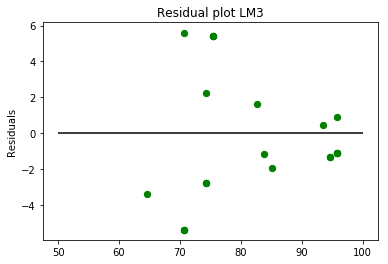

In [36]:
import numpy as np

y_test_pred_lm3 = lm3.predict(df_test[["exam3"]])

mse_test_lm3 = mean_squared_error(df_test["final_grade"], y_test_pred_lm3)
print(f"lm3 Test\n\tmse: {mse_test_lm3:.3}")

r2_test_lm3 = r2_score(df_test["final_grade"], y_test_pred_lm3)
print(f"\t{r2_test_lm3:.2%} of the variance in the student's final grade can be explained by the grade on the third exam.")

y_test_pred_lm3_fixed = np.array([[elem] for elem in y_test_pred_lm3])
print("")
plt.scatter(y_test_pred_lm3_fixed, y_test_pred_lm3_fixed - y_test, c='g', s=40)
plt.hlines(y=0, xmin=50, xmax=100)
plt.title("Residual plot LM3")
plt.ylabel('Residuals')

### 1.h. Which model performs the best, based on the 2 out-of-sample evaluation results (the example one, lm1, and the exercise one, lm3, from the above exercise).

lm1. It's MSE is about one-third of lm3's and it has a higher R2, which means it better explains the variance in the students' final grades.